<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/ml_lect3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Загрузка необходимых библиотек и модулей:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

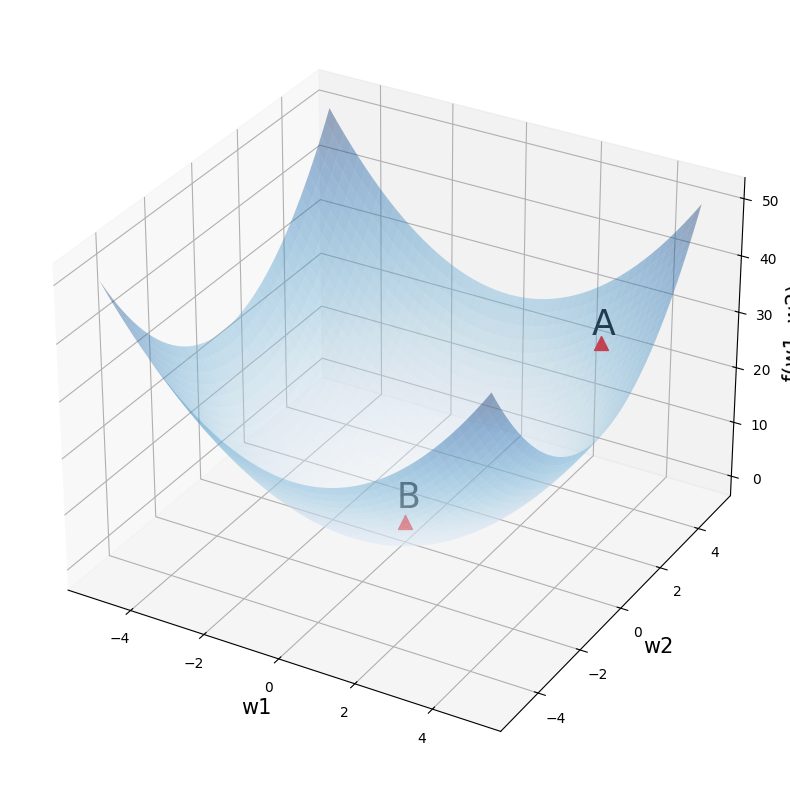

In [3]:
# установим размер графика
fig = plt.figure(figsize = (12,10))
# создадим последовательность из 1000 точек в интервале от -5 до 5
# для осей w1 и w2
w1 = np.linspace(-5, 5, 1000)
w2 = np.linspace(-5, 5, 1000)
# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)
# пропишем функцию
f = w1 ** 2 + w2 ** 2
# создадим трехмерное пространство
ax = fig.add_subplot(projection = '3d')
# выведем график функции, alpha задает прозрачность
ax.plot_surface(w1, w2, f, alpha = 0.4, cmap = 'Blues')
# выведем точку A с координатами (3, 4, 25) и подпись к ней
ax.scatter(3, 4, 25, c = 'red', marker = '^', s = 100)
ax.text(3, 3.5, 28, 'A', size = 25)
# аналогично выведем точку B с координатами (0, 0, 0)
ax.scatter(0, 0, 0, c = 'red', marker = '^', s = 100)
ax.text(0, -0.4, 4, 'B', size = 25)
# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
ax.set_zlabel('f(w1, w2)', fontsize = 15)
# выведем результат
plt.show()


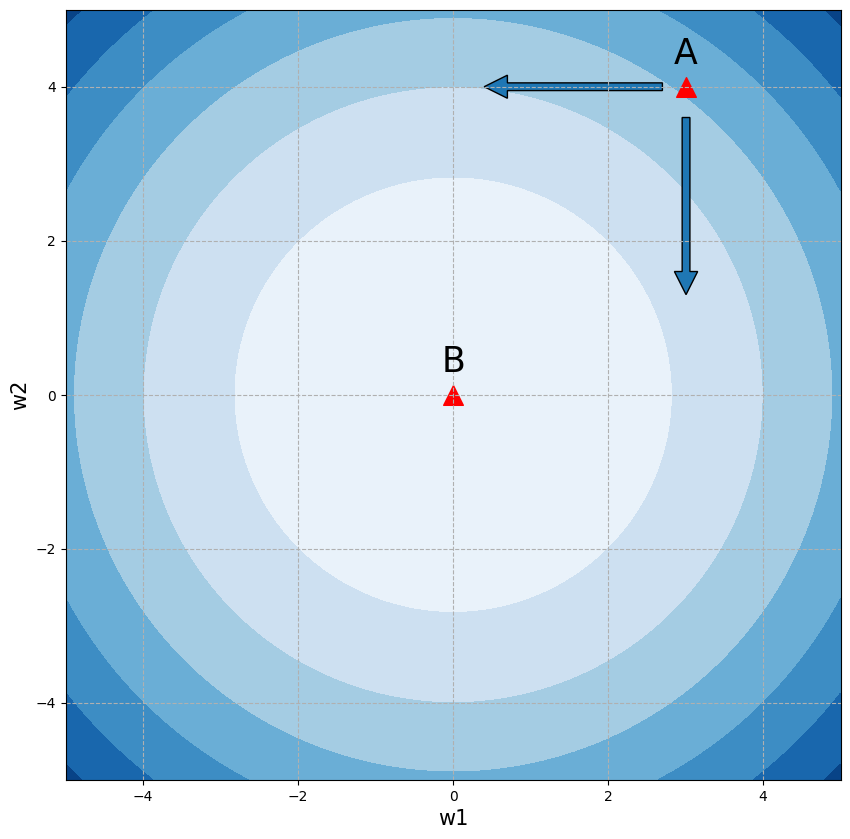

In [4]:
# установим размер графика
fig, ax = plt.subplots(figsize = (10,10))
# создадим последовательность из 100 точек в интервале от -5 до 5
# для осей w1 и w2
w1 = np.linspace(-5.0, 5.0, 100)
w2 = np.linspace(-5.0, 5.0, 100)
# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)
# пропишем функцию
C = w1 ** 2 + w2 ** 2
# построим изолинии (линии уровня)
plt.contourf(w1, w2, C, cmap = 'Blues')
# выведем точку А с координатами на плоскости (3, 4)
ax.scatter(3, 4, c = 'red', marker = '^', s = 200)
ax.text(2.85, 4.3, 'A', size = 25)
# и точку B с координатами (0, 0)
ax.scatter(0, 0, c = 'red', marker = '^', s = 200)
ax.text(-0.15, 0.3, 'B', size = 25)
# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
# а также стрелки направления изменений вдоль w1 и w2
ax.arrow(2.7, 4, -2, 0, width = 0.1, head_length = 0.3)
ax.arrow(3.005, 3.6, 0, -2, width = 0.1, head_length = 0.3)
# создадим сетку в виде прерывистой черты
plt.grid(linestyle = '--')
# выведем результат
plt.show()

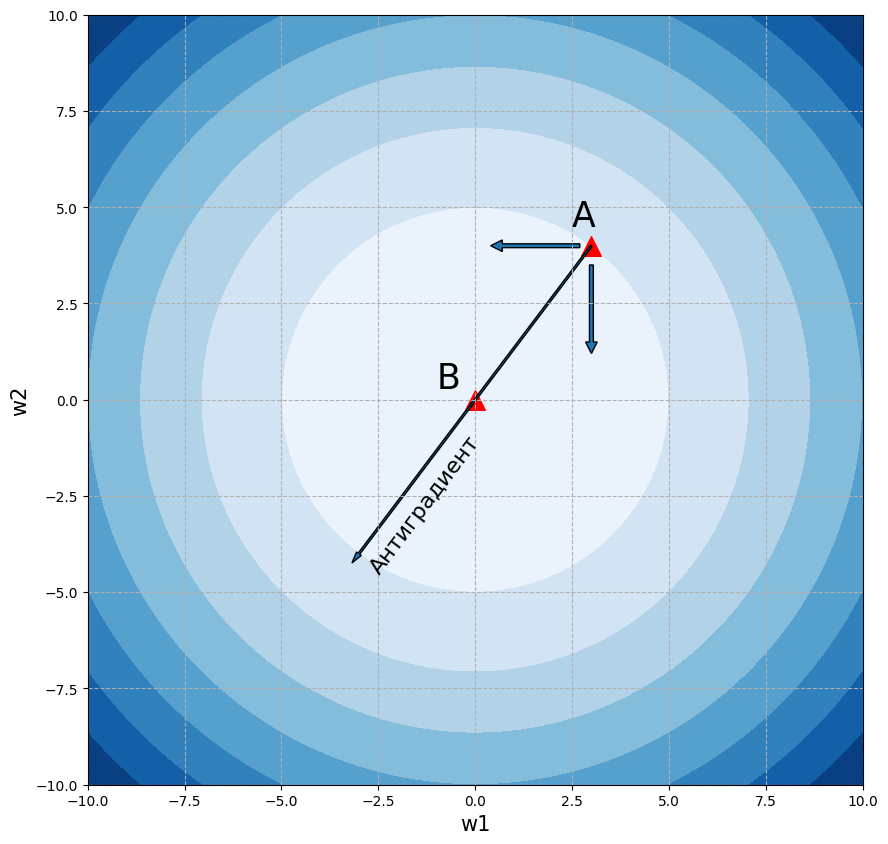

In [5]:
# установим размер графика
fig, ax = plt.subplots(figsize = (10,10))
# создадим последовательность из 100 точек в интервале от -10 до 10
# для осей w1 и w2
w1 = np.linspace(-10.0, 10.0, 100)
w2 = np.linspace(-10.0, 10.0, 100)
# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)
# пропишем функцию
C = w1 ** 2 + w2 ** 2
# построим изолинии (линии уровня)
plt.contourf(w1, w2, C, cmap = 'Blues')
# выведем точку А с координатами на плоскости (3, 4)
ax.scatter(3, 4, c = 'red', marker = '^', s = 200)
ax.text(2.5, 4.5, 'A', size = 25)
# и точку B с координатами (0, 0)
ax.scatter(0, 0, c = 'red', marker = '^', s = 200)
ax.text(-1, 0.3, 'B', size = 25)
# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
# а также стрелки направления изменений вдоль w1 и w2
ax.arrow(2.7, 4, -2, 0, width = 0.1, head_length = 0.3)
ax.arrow(3, 3.5, 0, -2, width = 0.1, head_length = 0.3)
# выведем вектор антиградиента с направлением (-6, -8)
ax.arrow(3, 4, -6, -8, width = 0.05, head_length = 0.3)
ax.text(-2.8, -4.5, 'Антиградиент', rotation = 53, size = 16)
# создадим сетку в виде прерывистой черты
plt.grid(linestyle = '--')
# выведем результат
plt.show()


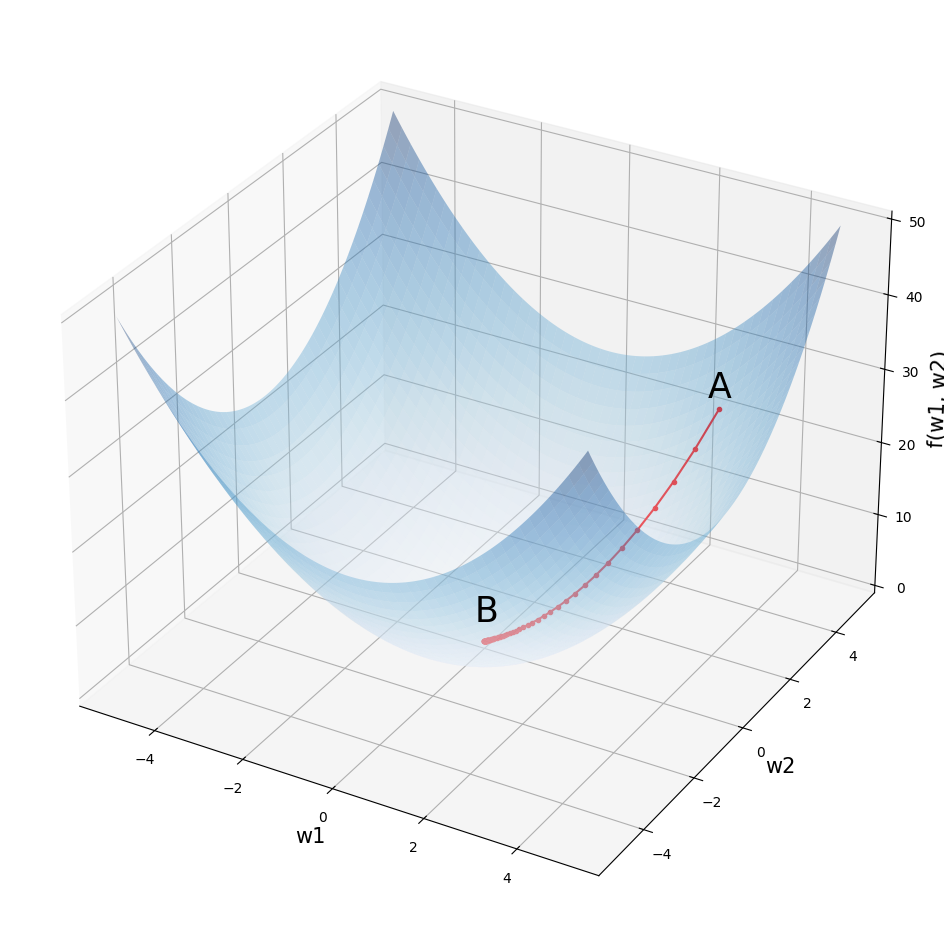

In [7]:
def objective(w1, w2):
  return w1 **2+ w2 **2

def partial_1(w1):
  return 2.0* w1
def partial_2(w2):
  return 2.0* w2
w1, w2=3,4


iter = 100
# и скорость обучения
learning_rate = 0.05
# создадим списки для учета весов и уровня ошибки
w1_list, w2_list, l_list = [], [], []
# в цикле с заданным количеством итераций
for i in range(iter):
  # будем добавлять текущие веса в соответствующие списки
  w1_list.append(w1)
  w2_list.append(w2)
  # и рассчитывать и добавлять в список текущий уровень ошибки
  l_list.append(objective(w1, w2))
  # также рассчитаем значение частных производных при текущих весах
  par_1 = partial_1(w1)
  par_2 = partial_2(w2)
  # будем обновлять веса в направлении,
  # обратном направлению градиента, умноженному на скорость обучения
  w1 = w1 - learning_rate * par_1
  w2 = w2 - learning_rate * par_2
# выведем итоговые веса модели и значение функции потерь
w1, w2, objective(w1, w2)
fig = plt.figure(figsize = (14,12))
w1 = np.linspace(-5, 5, 1000)
w2 = np.linspace(-5, 5, 1000)
w1, w2 = np.meshgrid(w1, w2)
f = w1 ** 2 + w2 ** 2
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(w1, w2, f, alpha = 0.4, cmap = 'Blues')
ax.text(3, 3.5, 28, 'A', size = 25)
ax.text(0, -0.4, 4, 'B', size = 25)
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
ax.set_zlabel('f(w1, w2)', fontsize = 15)
# выведем путь алгоритма оптимизации
ax.plot(w1_list, w2_list, l_list, '.-', c = 'red')
plt.show()


In [8]:
# Импорт библиотеки numpy для работы с массивами и matplotlib для визуализации данных
import numpy as np
import matplotlib.pyplot as plt
# Задаем массивы данных роста (X) и обхвата шеи (y)
X = np.array([1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53,
1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63,
1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68, 1.69, 1.70, 1.70,
1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78])
y = np.array([29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0,
30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8,
33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5,
36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5])


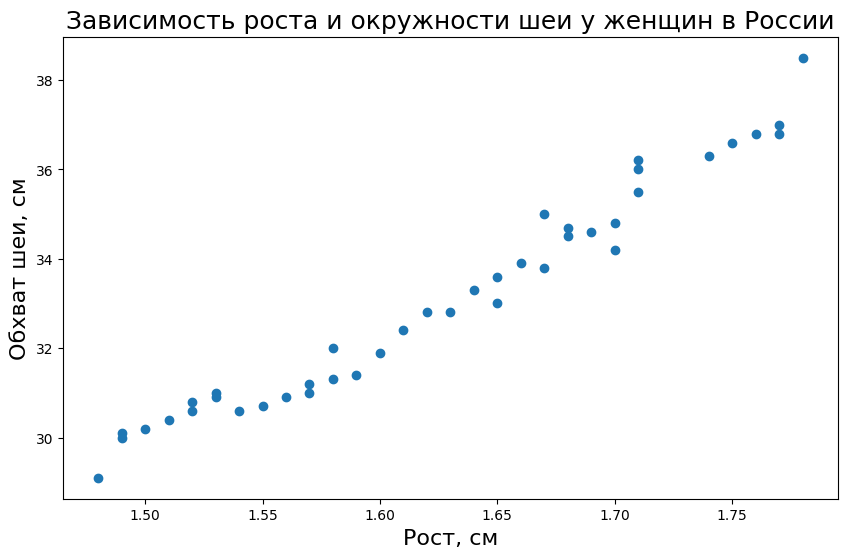

In [9]:
# Создаем точечную диаграмму для визуализации данных
plt.figure(figsize = (10,6))
plt.scatter(X, y)
# Добавляем подписи к осям и заголовок к графику
plt.xlabel('Рост, см', fontsize = 16)
plt.ylabel('Обхват шеи, см', fontsize = 16)
plt.title('Зависимость роста и окружности шеи у женщин в России',
fontsize = 18)
# Отображаем график
plt.show()


In [12]:
# Определение функции линейной регрессии
def regression(X, w, b):
  return w * X + b
# Определение функции потерь
def objective(X, y, w, b, n):
  return np.sum((y - regression(X, w, b)) ** 2) / (2 * n)
# Определение частной производной функции потерь по весу w
def partial_w(X, y, w, b, n):
  return np.sum(-X * (y - (w * X + b))) / n
# Определение частной производной функции потерь по смещению b
def partial_b(X, y, w, b, n):
  return np.sum(-(y - (w * X + b))) / n
# Функция для выполнения градиентного спуска
def gradient_descent(X, y, iter, learning_rate):
  w, b = 0, 0 # Начальные значения параметров модели
  n = len(X) # Количество точек данных
  # Списки для хранения истории значений параметров и функции потерь
  w_list, b_list, l_list = [], [], []
  for i in range(iter):
    w_list.append(w)
    b_list.append(b)
    l_list.append(objective(X, y, w, b, n))
    # Вычисление градиентов
    par_1 = partial_w(X, y, w, b, n)
    par_2 = partial_b(X, y, w, b, n)
    # Обновление параметров
    w = w - learning_rate * par_1
    b = b - learning_rate * par_2
  return w_list, b_list, l_list

26.69174625207742 -10.293843835595947 0.11378239841533976


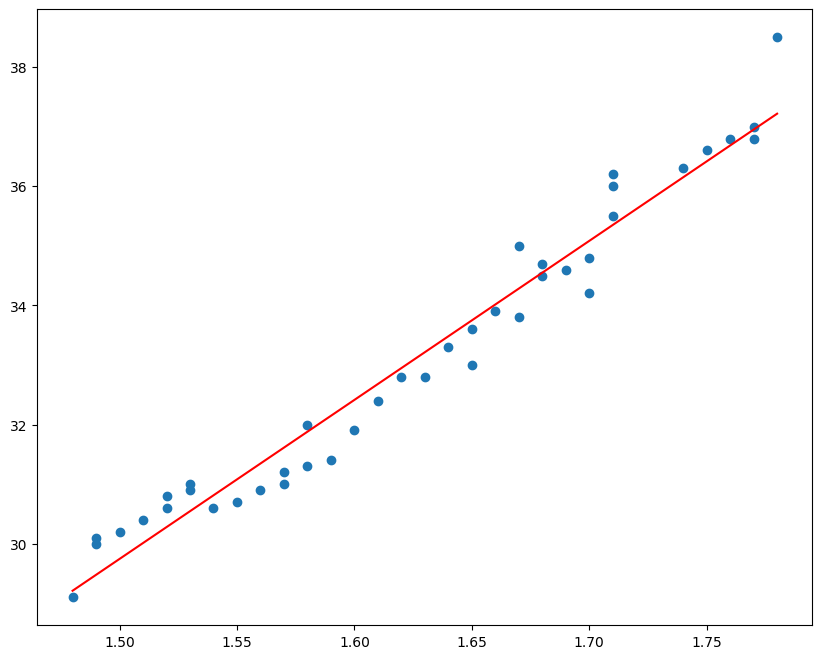

In [13]:
# Основной цикл градиентного спуска
# Выполнение градиентного спуска
w_list, b_list, l_list = gradient_descent(X, y, iter = 200000,
learning_rate = 0.01)
# Выводим последние значения веса, смещения и функции потерь
print(w_list[-1], b_list[-1], l_list[-1])
# Получаем предсказания модели
y_pred_gd = regression(X, w_list[-1], b_list[-1])
# Создаем новый график для визуализации результатов регрессии
plt.figure(figsize = (10, 8))
plt.scatter(X, y) # Точечная диаграмма исходных данных
plt.plot(X, y_pred_gd, 'r') # Линия предсказаний модели
plt.show()

In [14]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

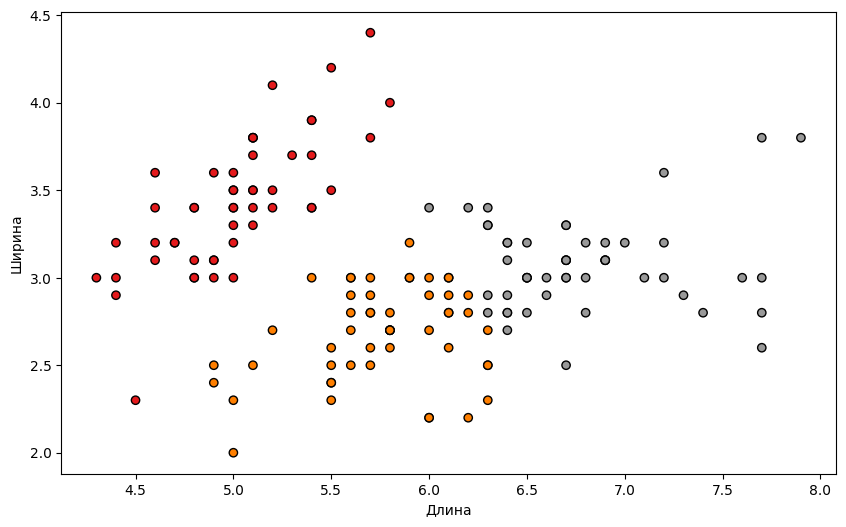

In [24]:
# Загрузка набора данных Iris
iris = load_iris()
# Извлечение первых двух признаков
x = iris.data[:, :2]
y = iris.target
# Инициализация классификатора логистической регрессии
clf = LogisticRegression()
# Обучение классификатора на данных
clf.fit(x, y)
# Прогнозирование меток классов для данных
y_pred = clf.predict(x)
# Построение графика точек данных с предсказанными метками
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k')
# Задание подписей для осей x и y
plt.xlabel('Длина')
plt.ylabel('Ширина')
# Отображение графика
plt.show()
